In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn import metrics
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore") 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier

7/7 [==============================] - 0s 2ms/step


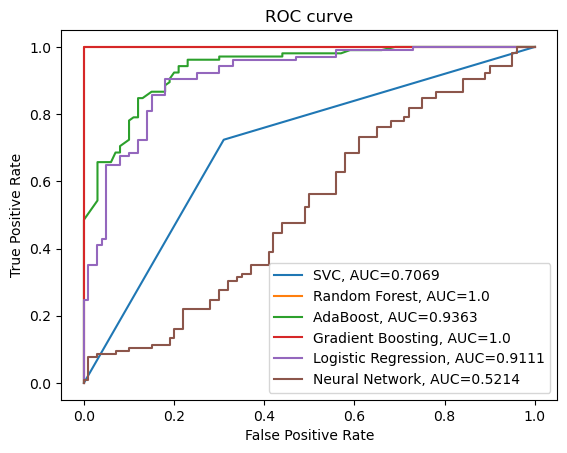

In [2]:
#________________________________________________HEART DATASET_________________________________________________#

heart_data=pd.read_csv('heart.csv')
heart_data.head(5)
X=heart_data.drop('target',axis=1)
y=heart_data["target"]
y_label = heart_data['target'].values.reshape(X.shape[0], 1)

def NeuralNetrandom():
    
    activation: softsign
    batch_size: 961
    dropout: 1
    dropout_rate: 1 
    epochs: 32
    layers1: 1 
    layers2: 1 
    learning_rate: 0.86 
    neurons: 8
    normalisation: 1 
    optimizer: Adam
        
    model = Sequential()
    model.add(Dense(8, input_shape=(13,)))
    model.add(Dense(1, activation='sigmoid'))

    # compile the model
    opt = Adam(learning_rate=0.01)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

row,col=X.shape
for i in range(1):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    
    model = SVC(C= 10, degree= 5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
    plt.plot(fpr,tpr,label="SVC, AUC="+str(auc))

    
    model = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 10, n_estimators= 150)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
    plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))
    
    model = AdaBoostClassifier(algorithm= 'SAMME.R', n_estimators= 10)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
    plt.plot(fpr,tpr,label="AdaBoost, AUC="+str(auc))
    
    model = GradientBoostingClassifier(n_estimators=50, max_features=1, max_depth=10, learning_rate=1,criterion='friedman_mse')
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
    plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))
    
    model = LogisticRegression(C= 10, intercept_scaling= 1.0, max_iter= 500)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
    plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))
    
    model = KerasClassifier(build_fn=NeuralNetrandom)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
    plt.plot(fpr,tpr,label="Neural Network, AUC="+str(auc))
    
    
    plt.title('ROC curve')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend()
    plt.savefig('heart_roc_curve.png')

4/4 [==============================] - 0s 3ms/step


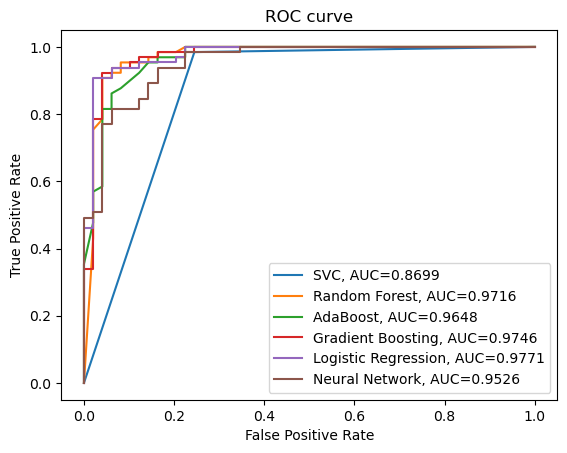

In [3]:
#__________________________________________________CANCER DATASET_________________________________________________#

cancer_data=pd.read_csv('Breast_cancer_data.csv')
cancer_data.head(5)
X=cancer_data.drop('diagnosis',axis=1)
y=cancer_data["diagnosis"]
y_label = cancer_data['diagnosis'].values.reshape(X.shape[0], 1)

def NeuralNetrandom():
    
    activation= 0
    batch_size= 200
    epochs=100
    optimizer_activation= 0
    optimizer_dropout_rate= 0.3
    optimizer_learning_rate= 0.001
    optimizer_neurons= 1
    optimizer_weight_constraint= 2.0
    optimizer= 7
        
    model = Sequential()
    model.add(Dense(3, input_shape=(5,)))
    model.add(Dense(1, activation='sigmoid'))

    # compile the model
    opt = Adam(learning_rate=0.01)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model
  
row,col=X.shape
for i in range(1):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    
    model = SVC(C= 3, degree= 5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
    plt.plot(fpr,tpr,label="SVC, AUC="+str(auc))

    
    model = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 1, n_estimators= 50)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
    plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))
    
    model = AdaBoostClassifier(algorithm= 'SAMME', n_estimators= 10)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
    plt.plot(fpr,tpr,label="AdaBoost, AUC="+str(auc))
    
    model = GradientBoostingClassifier(n_estimators=150, max_features=10, max_depth=1, learning_rate=1,criterion='friedman_mse')
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
    plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))
    
    model = LogisticRegression(C= 4, intercept_scaling= 3.0, max_iter= 866)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
    plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))
    
    model = KerasClassifier(build_fn=NeuralNetrandom)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
    plt.plot(fpr,tpr,label="Neural Network, AUC="+str(auc))
    
    plt.title('ROC curve')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend()
    plt.savefig('cancer_roc_curve.png')

5/5 [==============================] - 0s 3ms/step


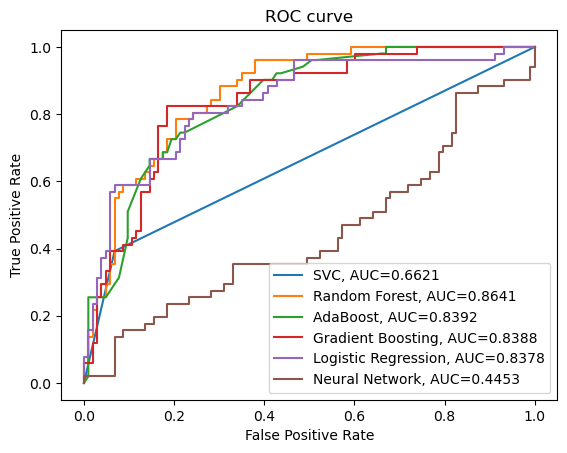

In [4]:
#__________________________________________________DIABETES DATASET_________________________________________________#

dia_data=pd.read_csv('diabetes.csv')
dia_data.head(5)
X=dia_data.drop('Outcome',axis=1)
y=dia_data["Outcome"]
y_label = dia_data['Outcome'].values.reshape(X.shape[0], 1)

def NeuralNetrandom():
    
    activation: softsign
    batch_size: 961
    dropout: 1
    dropout_rate: 1 
    epochs: 32
    layers1: 1 
    layers2: 1 
    learning_rate: 0.86 
    neurons: 61
    normalisation: 1 
    optimizer: Adam
        
    model = Sequential()
    model.add(Dense(61, input_shape=(8,)))
    model.add(Dense(1, activation='sigmoid'))

    # compile the model
    opt = Adam(learning_rate=0.01)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

row,col=X.shape
for i in range(1):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    
    model = SVC(C= 3, degree= 5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
    plt.plot(fpr,tpr,label="SVC, AUC="+str(auc))

    
    model = RandomForestClassifier(max_depth= 5, max_features= 8, n_estimators= 70)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
    plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))
    
    model = AdaBoostClassifier(algorithm= 'SAMME.R', n_estimators= 10)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
    plt.plot(fpr,tpr,label="AdaBoost, AUC="+str(auc))
    
    model = GradientBoostingClassifier(n_estimators=50, max_features=1, max_depth=1, learning_rate=1,criterion='friedman_mse')
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
    plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))
    
    model = LogisticRegression(C= 10, intercept_scaling= 1.0, max_iter= 500)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
    plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))
    
    model = KerasClassifier(build_fn=NeuralNetrandom)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
    plt.plot(fpr,tpr,label="Neural Network, AUC="+str(auc))
    
    plt.title('ROC curve')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend()
    plt.savefig('diabetes_roc_curve.png')

9/9 [==============================] - 0s 2ms/step


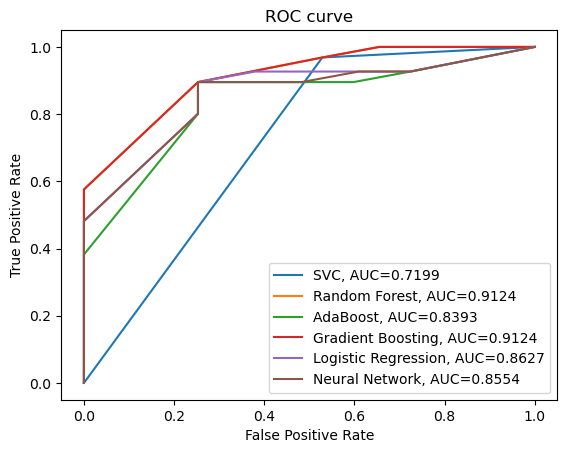

In [5]:
#__________________________________________________MENTALHEALTH DATASET_________________________________________________#

menh_data=pd.read_csv('mental_healthdataset.csv')
menh_data.head(5)
X=menh_data.drop('currMD',axis=1)
y=menh_data["currMD"]
y_label = menh_data['currMD'].values.reshape(X.shape[0], 1)

def NeuralNetrandom():
    
    batch_size= 200
    epochs=100
    optimizer_activation= 0
    optimizer_dropout_rate= 0
    optimizer_learning_rate= 0.001
    optimizer_neurons= 6
    optimizer_weight_constraint= 1.0
    optimizer= 0
        
    model = Sequential()
    model.add(Dense(63, input_shape=(6,)))
    model.add(Dense(1, activation='sigmoid'))

    # compile the model
    opt = Adam(learning_rate=0.01)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

row,col=X.shape
for i in range(1):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    
    model = SVC(C= 6, degree= 19)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
    plt.plot(fpr,tpr,label="SVC, AUC="+str(auc))

    
    model = RandomForestClassifier(max_depth= 4, max_features= 10, n_estimators= 123)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
    plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))
    
    model = AdaBoostClassifier(algorithm= 'SAMME.R', n_estimators= 3)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
    plt.plot(fpr,tpr,label="AdaBoost, AUC="+str(auc))
    
    model = GradientBoostingClassifier(n_estimators=150, max_features=1, max_depth=10, learning_rate=0.01,criterion='friedman_mse')
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
    plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))
    
    model = LogisticRegression(C= 10, intercept_scaling= 1.0, max_iter= 500)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
    plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))
    
    model = KerasClassifier(build_fn=NeuralNetrandom)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
    plt.plot(fpr,tpr,label="Neural Network, AUC="+str(auc))
    
    plt.title('ROC curve')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend()
    plt.savefig('mentalhealth_roc_curve.png')